In [153]:
#Today I'll be using a subset of the Million Sond Dataset to create a predictive model
# that will predict whether a song appears in the top 20 genres. 
#We'll start by importing the basic libraries.
import numpy as np
import pandas as pd

In [154]:
#Reading in our csv from our local machine.
song_data=pd.read_csv(r'C:\Users\hdmec\Song Data\MillionSongsSubset.csv')

In [155]:
#Let's check out what, we're working with!
song_data.head()

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,...,Energy,Key,KeyConfidence,Mode,ModeConfidence,Release,SongHotttness,StartOfFadeOut,Genre,TrackId
0,1,SOBQSLF12A8C139785,296721,The Heart Of Christmas,ARLNSD41187FB4D9A0,42.50382,Italy,12.57347,Sergio Franchi,NaN,...,0.0,8,0.217,1,0.241,The Heart Of Christmas,0.641771,165.581,NaN,TRAGGVT128F428F842
1,2,SOMDTTT12A8C13F1CB,303421,Soul Friends,ARISHTQ1187FB3E6F0,NaN,NaN,NaN,Ben E. King,NaN,...,0.0,10,0.608,1,0.596,Soul Friends,NaN,159.997,classic pop and rock,TRAGGSJ128F42A5AE1
2,3,SOGOJEP12AB018D355,675211,Ghetto Fabolous [Explicit Version],AR3FE581187FB3F90A,NaN,Brooklyn NY,NaN,Fabolous,NaN,...,0.0,1,0.164,1,0.080,Ghetto Fabolous [Explicit Version],NaN,212.869,hip hop rnb and dance hall,TRAGGKN12903CCA8EE
3,4,SOLAZFN12AB018A094,725669,Afro-Indio,AR1N6N61187FB4E25E,23.08330,Havana Cuba [Jesus Maria],-82.41670,Mongo Santamaria,NaN,...,0.0,2,0.579,0,0.696,Afro-Indio,NaN,182.503,NaN,TRAGGXK12903CDA84B
4,5,SOJPZIX12AB018B2BD,769725,Riddim Of Silence,ARJJRZ41187FB4C856,NaN,NaN,NaN,Floor,NaN,...,0.0,0,0.045,1,0.298,Riddim Of Silence,0.266955,202.368,NaN,TRAGGMY12903CD9533


In [156]:
#Yikes, a bit messy but we'll get to that later. First let's find out what those top 20 genres are!
top_20=song_data['Genre'].value_counts().head(20).index[:].tolist()

In [157]:
#Nice. Wasn't expecting finnish, and so high up on the list!, but nice!
top_20

['classic pop and rock',
 'hip hop rnb and dance hall',
 'rock and indie',
 'folk',
 'production music',
 'pop and chart',
 'finnish',
 'french',
 'soul and reggae',
 'jazz and blues',
 'german',
 'american',
 'uk | british | english | classic pop and rock',
 'country',
 'world',
 'dance and electronica',
 'classic pop and rock | folk',
 'rock and indie | hip hop',
 'blues',
 'greek']

In [158]:
#Let's search the genre column with our new list and extract boolean values based on whether or not the 
# the song exists in the top 20!
song_data['top_20_genre']=song_data['Genre'].isin(top_20)

In [159]:
song_data.head()

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,...,Key,KeyConfidence,Mode,ModeConfidence,Release,SongHotttness,StartOfFadeOut,Genre,TrackId,top_20_genre
0,1,SOBQSLF12A8C139785,296721,The Heart Of Christmas,ARLNSD41187FB4D9A0,42.50382,Italy,12.57347,Sergio Franchi,NaN,...,8,0.217,1,0.241,The Heart Of Christmas,0.641771,165.581,NaN,TRAGGVT128F428F842,False
1,2,SOMDTTT12A8C13F1CB,303421,Soul Friends,ARISHTQ1187FB3E6F0,NaN,NaN,NaN,Ben E. King,NaN,...,10,0.608,1,0.596,Soul Friends,NaN,159.997,classic pop and rock,TRAGGSJ128F42A5AE1,True
2,3,SOGOJEP12AB018D355,675211,Ghetto Fabolous [Explicit Version],AR3FE581187FB3F90A,NaN,Brooklyn NY,NaN,Fabolous,NaN,...,1,0.164,1,0.080,Ghetto Fabolous [Explicit Version],NaN,212.869,hip hop rnb and dance hall,TRAGGKN12903CCA8EE,True
3,4,SOLAZFN12AB018A094,725669,Afro-Indio,AR1N6N61187FB4E25E,23.08330,Havana Cuba [Jesus Maria],-82.41670,Mongo Santamaria,NaN,...,2,0.579,0,0.696,Afro-Indio,NaN,182.503,NaN,TRAGGXK12903CDA84B,False
4,5,SOJPZIX12AB018B2BD,769725,Riddim Of Silence,ARJJRZ41187FB4C856,NaN,NaN,NaN,Floor,NaN,...,0,0.045,1,0.298,Riddim Of Silence,0.266955,202.368,NaN,TRAGGMY12903CD9533,False


C:\Users\hdmec\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


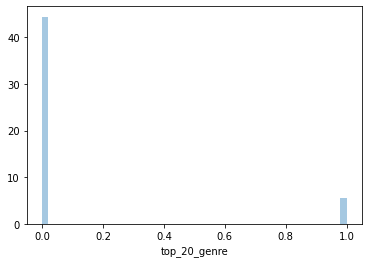

In [162]:
#Let's see if there's a skew in our target.
%matplotlib inline
import seaborn as sns
song_data_target = song_data['top_20_genre']
sns.distplot(song_data_target);

In [160]:
#Nice. Now that we've created our target column, let's start cleaning up some of this data.
#We'll start by figuring out how many NaN values exist in our dataset!
song_data.isnull().sum()

SongNumber                     0
SongID                         0
AlbumID                        0
AlbumName                      0
ArtistID                       3
ArtistLatitude              6258
ArtistLocation              4292
ArtistLongitude             6258
ArtistName                     0
Danceability               10000
Duration                       0
KeySignature                   0
KeySignatureConfidence         0
Loudness                       0
Tempo                          0
TimeSignature                  0
TimeSignatureConfidence        0
Title                          1
Year                        5320
ArtistFamiliarity              4
ArtistHotttnesss               0
AudioMd5                       0
EndOfFadeIn                    0
Energy                         0
Key                            0
KeyConfidence                  0
Mode                           0
ModeConfidence                 0
Release                        0
SongHotttness               4352
StartOfFad

In [129]:
#Ooof, that is a ton of NaNs, but some of these columns may not even be necessary so let's not
#hack and slash our poor rows just yet. But all those NaNs in our Genre column could create an issue.
#Even though we're going to end up dropping it, let's remove the rows with NaN values so they don't appear
#in the target column.
song_data = song_data[song_data['Genre'].notna()]

In [130]:
#Now that the rows with NaN values have been removed, we'll drop the Genre column to avoid any leakage.
song_data= song_data.drop('Genre', axis=1)

In [131]:
song_data.head()

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,...,Energy,Key,KeyConfidence,Mode,ModeConfidence,Release,SongHotttness,StartOfFadeOut,TrackId,top_20_genre
1,2,SOMDTTT12A8C13F1CB,303421,Soul Friends,ARISHTQ1187FB3E6F0,NaN,NaN,NaN,Ben E. King,NaN,...,0.0,10,0.608,1,0.596,Soul Friends,NaN,159.997,TRAGGSJ128F42A5AE1,True
2,3,SOGOJEP12AB018D355,675211,Ghetto Fabolous [Explicit Version],AR3FE581187FB3F90A,NaN,Brooklyn NY,NaN,Fabolous,NaN,...,0.0,1,0.164,1,0.080,Ghetto Fabolous [Explicit Version],NaN,212.869,TRAGGKN12903CCA8EE,True
5,6,SOHZHHE12A8C1360C0,144765,Quod Superius Sicut Inferius,ARF3L8J1187B9B7866,37.97615,Athens Greece,23.73641,Astarte,NaN,...,0.0,4,0.596,0,0.566,Quod Superius Sicut Inferius,0.443291,476.700,TRAGGVS128F4250CE8,False
9,10,SOFAWJJ12AB0180A39,543041,Aitai,ARVFGPJ1187B9A2477,NaN,NaN,NaN,Michelle & Vickie,NaN,...,0.0,10,0.226,0,0.519,Aitai,NaN,182.967,TRAGGQQ128F931D8E1,False
10,11,SOLKBKQ12A8C13400C,87397,LIVE IN CONCERT,ARHT0B11187B993CB3,30.22032,Lafayette LA,-92.01705,Eddy Raven,NaN,...,0.0,5,0.920,1,0.658,LIVE IN CONCERT,NaN,204.852,TRAGGHA128F4262D55,True


In [133]:
#Let's remove some of these other columns that have so many NaN values that they're basically obselete.
#Going forward, to retain the original dataset and keep influence on the remaining to a bare minimum,
#I'll be making copies of the cleaned datasets.
do_not_need=['SongID','AlbumID','ArtistID','ArtistLatitude','ArtistLongitude',
             'Danceability','AlbumName','Release']
sd_copy=song_data.copy().drop(do_not_need, axis=1)

In [134]:
#This will be our home base from now on.
sd_copy = sd_copy.copy()

In [135]:
#Before we do anything else, let's run a baseline model to get a good idea of what would happen if
#we just guessed.
from sklearn.model_selection import train_test_split

In [136]:
#First we'll split our model into train and test sets.
sdbase_train,sdbase_test=train_test_split(sd_copy, test_size=0.20, random_state=42)
sdbase_train.shape, sdbase_test.shape

((2968, 25), (742, 25))

In [137]:
#Then we'll further split the train set into a train and val set, this way we can validate our model 
#on different information. Not necessary really for a baseline but I like to get in the happy of 
# doing it. 
sdbase_train, sdbase_val = train_test_split(sdbase_train, test_size = 0.20, random_state=42)
sdbase_train.shape, sdbase_val.shape

((2374, 25), (594, 25))

In [138]:
#Now we'll seperate our target from the rest of the features.
target = ['top_20_genre']

x_train_base = sdbase_train.drop(target, axis=1)
y_train_base = sdbase_train[target]
x_val_base = sdbase_val.drop(target, axis=1)
y_val_base = sdbase_val[target]
x_test_base = sdbase_test.drop(target, axis=1)
y_test_base = sdbase_test[target]

In [139]:
#We'll make sure our shapes are looking good real quick.
print(x_train_base.shape, y_train_base.shape)
print(x_val_base.shape, y_val_base.shape)
print(x_test_base.shape, y_test_base.shape)

(2374, 24) (2374, 1)
(594, 24) (594, 1)
(742, 24) (742, 1)


In [140]:
#Now let's import most of the libraries we'll need to run some well known predictive models.
#Nothing too fancy but we've got the essentials.
#As a very basic example we'll run a linear regression model. We won't expect miracles here.
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

lr_base_model= make_pipeline(ce.OrdinalEncoder(),
                            IterativeImputer(),
                            StandardScaler(),
                            LinearRegression())
lr_base_model.fit(x_train_base, y_train_base)
print('Linear Regression R^2', lr_base_model.score(x_val_base, y_val_base))

Linear Regression R^2 0.025164760869478386


In [141]:
#As suspected, not a great fit even for a baseline. Logistic regression works better with classification
#So let's give that a go.
log_base_model= make_pipeline(ce.OrdinalEncoder(),
                            IterativeImputer(),
                            StandardScaler(),
                            LogisticRegression())
log_base_model.fit(x_train_base, y_train_base)
print('Training Accuracy', log_base_model.score(x_train_base, y_train_base))
print('Validation Accuracy', log_base_model.score(x_val_base, y_val_base))

Training Accuracy 0.6983993260320135
Validation Accuracy 0.7289562289562289


C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [142]:
#It seems like by just guessing our model doesn't actually perform terribly. But that could be due to 
# a ton of reasons, one of those being leakage. Let's run a different model that is prone to 
# overfitting and might represent leakage a bit better.
rf_base_model = make_pipeline(ce.OrdinalEncoder(),
                              IterativeImputer(),
                             RandomForestClassifier(random_state=42))
rf_base_model.fit(x_train_base, y_train_base)
print('Training Accuracy', rf_base_model.score(x_train_base, y_train_base))
print('Validation Accuracy', rf_base_model.score(x_val_base, y_val_base))

C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Training Accuracy 1.0
Validation Accuracy 0.7542087542087542


In [144]:
#Yikes, definitely overfitting.
#Let's check out some visuals that will help us see the relationships between our features, as well as
#an ROC curve that will help us identify some other info about our model. 

import eli5
from eli5.sklearn import PermutationImportance

transformers = make_pipeline(ce.OrdinalEncoder(),
                              IterativeImputer())
x_train_transformed = transformers.fit_transform(x_train_base)
x_val_transformed = transformers.transform(x_val_base)

rf_model = RandomForestClassifier(random_state=42,n_jobs=-1)
rf_model.fit(x_train_transformed,y_train_base)

feature_names = x_val_base.columns.tolist()

permuter = PermutationImportance(
rf_model,
scoring = 'accuracy',
n_iter = 5,
random_state=42)

permuter.fit(x_val_transformed, y_val_base)

eli5.show_weights(
permuter,
top=None,
feature_names=feature_names)

C:\Users\hdmec\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Weight,Feature
0.0229 ± 0.0132,ArtistFamiliarity
0.0185 ± 0.0119,ArtistHotttnesss
0.0145 ± 0.0062,ArtistName
0.0094 ± 0.0087,Key
0.0094 ± 0.0094,Tempo
0.0088 ± 0.0117,ArtistLocation
0.0074 ± 0.0089,Duration
0.0071 ± 0.0140,Loudness
0.0061 ± 0.0132,StartOfFadeOut
0.0057 ± 0.0034,Year


In [164]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'ArtistHotttnesss'

isolated = pdp_isolate(
    model=rf_base_model,
    dataset=x_val_base,
    model_features=x_val_base.columns,
    feature=feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1f1b0eef448>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1f1b0f44188>})

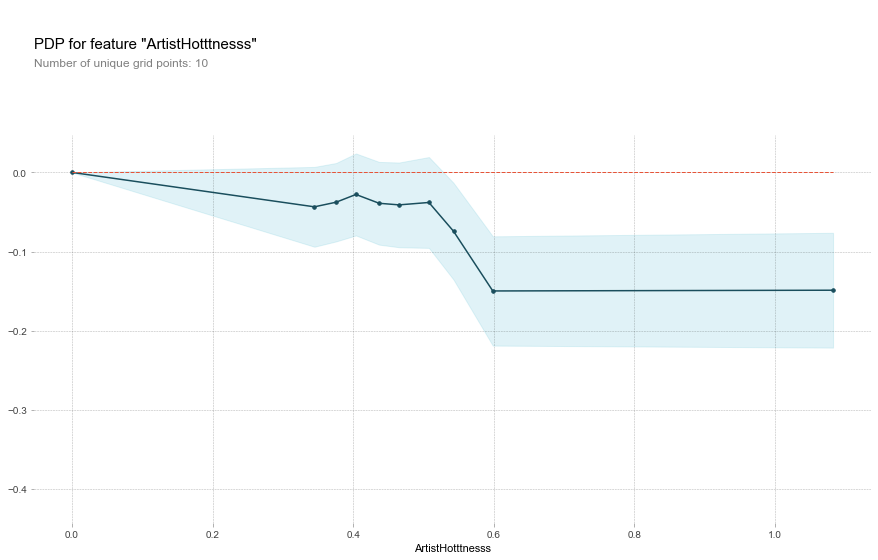

In [165]:
pdp_plot(isolated, feature_name=feature)

In [179]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['ArtistHotttnesss', 'ArtistFamiliarity']

interaction = pdp_interact(
    model=rf_base_model,
    dataset=x_val_base,
    model_features=x_val_base.columns,
    features=features
)


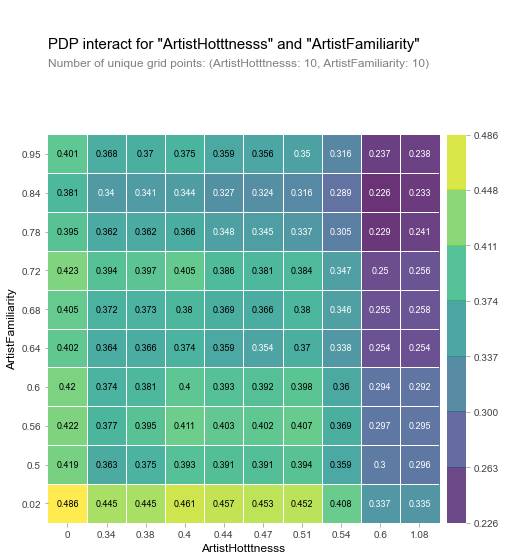

In [182]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

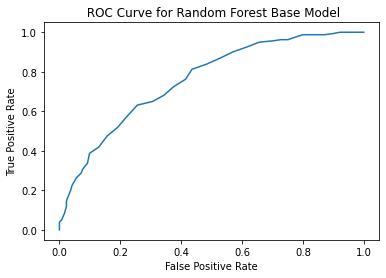

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_forest = rf_base_model.predict_proba(x_val_base)[:,-1]
fpr,tpr, thresholds = roc_curve(y_val_base, y_pred_prob_forest)
plt.plot(fpr,tpr)

plt.title(' ROC Curve for Random Forest Base Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [74]:
#Based on the exploratory visuals we've picked up from our visualizations and some common knowledge,
#let's create a function that will wrangle our data in one go.
def wrangle(X):
    
    unnecessary=['SongNumber','SongID','AlbumID','ArtistID','ArtistLatitude','ArtistLongitude','ArtistName',
                 'Danceability','AlbumName','Release','Energy','TrackId','AudioMd5','Title','SongHotttness',
                 'Key', 'KeySignatureConfidence','TimeSignature','Mode','KeyConfidence','Duration']
    
    X = X.copy().drop(unnecessary, axis=1)
    
    X.dropna(subset=['ArtistLocation','Year'], inplace=True)
    
    X['Year']=X['Year'].astype(int)
    
    X=X.reset_index().drop('index',axis=1)
    
    return X

train_first = wrangle(song_data)
train_first.shape

(1899, 12)

In [75]:
#Let's check out what our dataset looks like now!
train_first.head()

,ArtistLocation,KeySignature,Loudness,Tempo,TimeSignatureConfidence,Year,ArtistFamiliarity,ArtistHotttnesss,EndOfFadeIn,ModeConfidence,StartOfFadeOut,top_20_genre
0,Athens Greece,4,-4.694,129.088,0.453,2002,0.537088,0.352919,0.427,0.566,476.700,False
1,Lafayette LA,5,-11.140,133.428,0.061,1995,0.464994,0.344721,0.000,0.658,204.852,True
2,Wilmette IL,2,-3.237,140.878,0.930,2007,0.937965,0.566623,0.000,0.270,191.216,False
3,London England,2,-4.556,114.902,0.000,1978,0.822433,0.531303,0.444,0.420,192.830,False
4,Barking Essex England,0,-17.810,81.256,1.000,2008,0.703691,0.529196,0.000,0.558,169.407,False


In [76]:
#Check for null values
train_first.isnull().sum()

ArtistLocation             0
KeySignature               0
Loudness                   0
Tempo                      0
TimeSignatureConfidence    0
Year                       0
ArtistFamiliarity          0
ArtistHotttnesss           0
EndOfFadeIn                0
ModeConfidence             0
StartOfFadeOut             0
top_20_genre               0
dtype: int64

In [77]:
#Let's check the cardinality of our dataset to get a good idea of the encoder we should use!
train_first.apply(pd.Series.nunique)

ArtistLocation              395
KeySignature                 12
Loudness                   1780
Tempo                      1878
TimeSignatureConfidence     668
Year                         60
ArtistFamiliarity           684
ArtistHotttnesss            662
EndOfFadeIn                 595
ModeConfidence              664
StartOfFadeOut             1851
top_20_genre                  2
dtype: int64

In [78]:
#Just for fun, let's create a function that will also split our data 3 ways for later use!
def train_val_test(X):
    ''' Will split a dataframe into seperate training, validation, and test sets'''
    X=X.copy()
    train,test=train_test_split(X, test_size=0.20, random_state=42)
    train, val = train_test_split(train, test_size = 0.20, random_state=42)
    
    return train, val, test

In [79]:
train, val, test = train_val_test(train_first)

In [80]:
#It worked nicely.
train.shape, val.shape, test.shape

((1215, 12), (304, 12), (380, 12))

In [81]:
train_top1 = train
val_top1 = val
test_top1 = test

In [82]:
target = ['top_20_genre']

x_train_top1 = train_top1.drop(target, axis=1)
y_train_top1 = train_top1[target]
x_val_top1 = val_top1.drop(target, axis=1)
y_val_top1 = val_top1[target]
x_test_top1 = test_top1.drop(target, axis=1)
y_test_top1 = test_top1[target]

In [83]:
x_train_top1.shape, y_train_top1.shape

((1215, 11), (1215, 1))

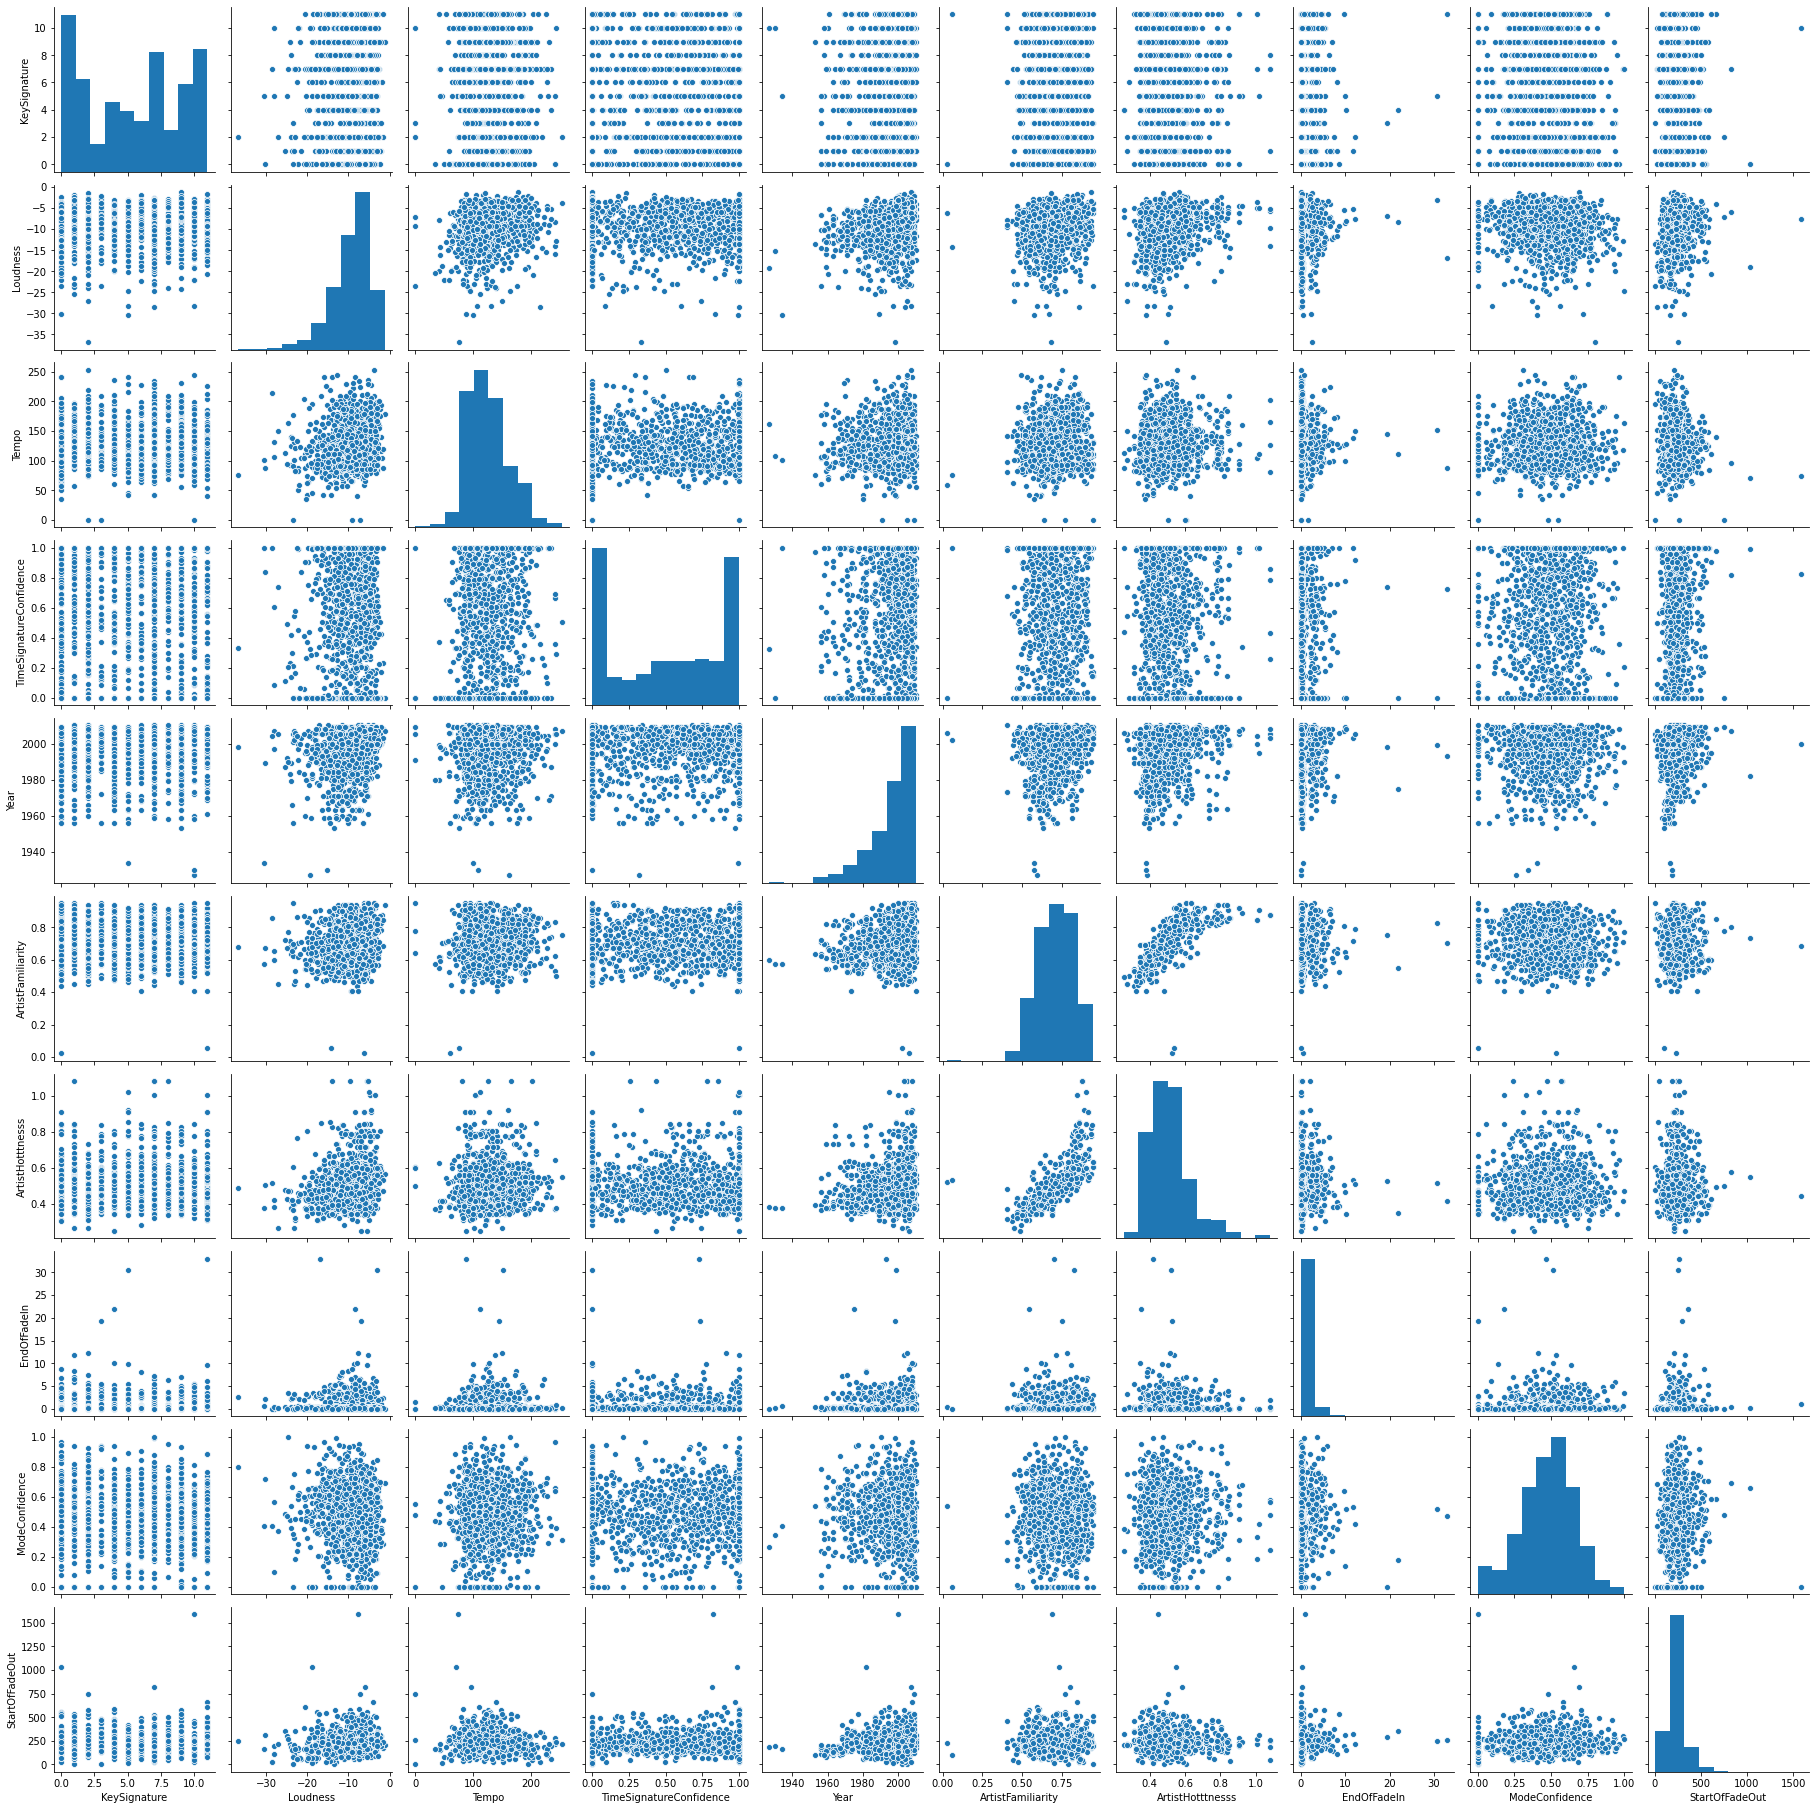

In [152]:
#Let's do a quick exploration of our squeaky clean dataset and see if there are any strong relations in 
#our dataset. We may be able to get a better feel of which model and what paremters to use.
import seaborn as sns
explore = sns.pairplot(x_train_top1)
explore

In [84]:
#We'll start by fitting our original logistic regression model
log_top1_model= make_pipeline(ce.OrdinalEncoder(), 
                              LogisticRegression(max_iter=860,
                                               random_state=42))
log_top1_model.fit(x_train_top1, y_train_top1)
print('Training Accuracy', log_top1_model.score(x_train_top1, y_train_top1))
print('Validation Accuracy', log_top1_model.score(x_val_top1, y_val_top1))

C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy 0.6979423868312757
Validation Accuracy 0.7697368421052632


In [85]:
#Better! But I think we can still get it a bit higher. Let's try bagging with Random Forest.
rf_top1_model = make_pipeline(ce.OrdinalEncoder(),
                             RandomForestClassifier(n_estimators =200,
                                                    oob_score=True,
                                                    max_depth=30,
                                                    max_leaf_nodes=40,
                                                    random_state=42,
                                                    warm_start=True,
                                                    n_jobs=-1)
                             )
rf_top1_model.fit(x_train_top1, y_train_top1)
print('Training Accuracy', rf_top1_model.score(x_train_top1, y_train_top1))
print('Validation Accuracy', rf_top1_model.score(x_val_top1, y_val_top1))

C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Training Accuracy 0.8724279835390947
Validation Accuracy 0.7631578947368421


In [86]:
#Not much better and we've opened the gap between our accuracies a bit. Let's see if Gradient Boosting
#Can help us here!
from sklearn.ensemble import GradientBoostingClassifier

gb_top1_model = make_pipeline(ce.OrdinalEncoder(),
                             GradientBoostingClassifier(n_estimators=100,
                                                        min_samples_leaf=9,
                                                        max_depth=3,
                                                        random_state=42))

gb_top1_model.fit(x_train_top1, y_train_top1)
print('Training Accuracy', gb_top1_model.score(x_train_top1, y_train_top1))
print('Validation Accuracy', gb_top1_model.score(x_val_top1, y_val_top1))
print('Test Accuracy', gb_top1_model.score(x_test_top1, y_test_top1))

C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy 0.8872427983539095
Validation Accuracy 0.7861842105263158
Test Accuracy 0.7657894736842106


In [87]:
#Much better! We closed the gap a bit and ended up with a better score. I also ran my test accuracy on
#the Gradient Boosting Classifier. Let's double check our work!
from sklearn.metrics import accuracy_score
y_pred = gb_top1_model.predict(x_test_top1)
test_accuracy = accuracy_score(y_pred, y_test_top1)
print(test_accuracy)

0.7657894736842106


C:\Users\hdmec\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[False, True] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


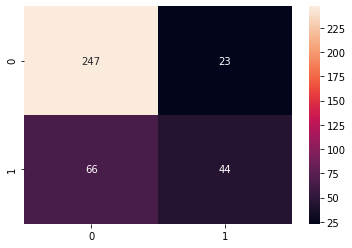

In [88]:
#Fantastic! From the test accuracy above and the confusion matrix below we get a good idea of how our 
#model is predicting our data and how accurately!
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [False,True]
cm = confusion_matrix(y_test_top1, y_pred, labels)

ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g');

plt.show()

In [89]:
#Below is some data manipulation for the dash app I was going to create but unfortuntely failed to deploy
# for now. 
import pickle
file = open(f'resources/model_gb.pkl','wb')
pickle.dump(gb_top1_model, file)
file.close()

In [90]:
x_train_top1.head()

,ArtistLocation,KeySignature,Loudness,Tempo,TimeSignatureConfidence,Year,ArtistFamiliarity,ArtistHotttnesss,EndOfFadeIn,ModeConfidence,StartOfFadeOut
1755,Tacoma WA,7,-10.173,154.246,0.000,1967,0.653341,0.449608,0.308,0.516,99.643
632,Anderson IN,2,-3.254,199.028,0.000,2004,0.827854,0.517329,0.000,0.592,199.262
1837,Cross Lane WV,9,-14.479,79.091,0.911,2002,0.603383,0.422127,0.160,0.504,114.672
1136,Boston MA,9,-5.386,183.808,0.000,2002,0.793094,0.568492,0.000,0.254,183.687
263,Chicago IL,5,-5.971,88.096,0.335,2007,0.902063,0.554633,2.009,0.446,205.781


In [91]:
x_train_top1.describe()

,KeySignature,Loudness,Tempo,TimeSignatureConfidence,Year,ArtistFamiliarity,ArtistHotttnesss,EndOfFadeIn,ModeConfidence,StartOfFadeOut
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,5.382716,-9.355322,125.979229,0.513795,1995.821399,0.711894,0.510957,0.803937,0.476983,235.147076
std,3.533208,4.659013,35.733734,0.379678,12.280167,0.115946,0.117117,2.086245,0.188103,102.347512
min,0.000000,-36.835000,0.000000,0.000000,1927.000000,0.023504,0.251094,0.000000,0.000000,1.044000
25%,2.000000,-11.786500,99.041500,0.090000,1991.000000,0.628896,0.427697,0.000000,0.360500,175.528500
50%,6.000000,-8.355000,122.376000,0.553000,1999.000000,0.706828,0.498498,0.191000,0.490000,223.893000
75%,9.000000,-5.976000,146.733000,0.889500,2005.000000,0.804681,0.566623,0.397000,0.604000,275.534000
max,11.000000,-1.217000,253.357000,1.000000,2010.000000,0.947328,1.082503,32.972000,1.000000,1588.216000


In [92]:
#Making a list of years for my dash app dropdown!
years = [*range(1900,2021,1)]

In [93]:
years=[{'label':y, 'value':y}
      for y in years]

In [94]:
#Making a list of Locations for my dash app dropdown!
location=x_train_top1['ArtistLocation'].tolist()

In [95]:
location=list(dict.fromkeys(location))

In [96]:
location=[{'label':l, 'value':l}
          for l in location]